# Uber Data Analysis

Welcome! This project serves to practice and demonstrate my skills in exploratory data analysis and modelling of high-dimensional data. For now, this notebook is a WIP!

## Loading Data 💿

Before any analysis, we must load the data using pandas. We are assuming - based on the info given - that the data set is complete, does not contain duplicates and does not contain any N/A.

In [2]:
import pandas as pd

apr14 = pd.read_csv("../Data/uber-raw-data-apr14.csv", parse_dates=['Date/Time'])
may14 = pd.read_csv("../Data/uber-raw-data-may14.csv", parse_dates=['Date/Time'])
jun14 = pd.read_csv("../Data/uber-raw-data-jun14.csv", parse_dates=['Date/Time'])
jul14 = pd.read_csv("../Data/uber-raw-data-jul14.csv", parse_dates=['Date/Time'])
aug14 = pd.read_csv("../Data/uber-raw-data-aug14.csv", parse_dates=['Date/Time'])
sep14 = pd.read_csv("../Data/uber-raw-data-sep14.csv", parse_dates=['Date/Time'])

## Amount of Trips between Month 🚘

At first, let's take a look at how many rides have been taken in each month. We can simply visualize this with a bar plot.

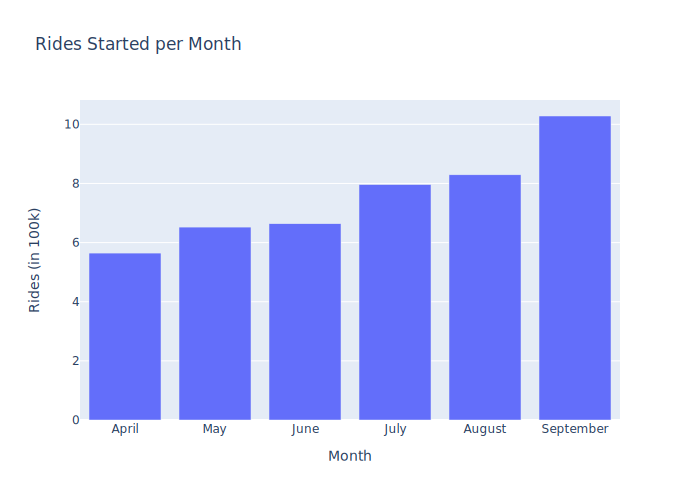

In [3]:
import plotly.express as px
import numpy as np
import plotly.io as pio

pio.renderers.default = "svg"

bar_plot = px.bar(y=np.array([apr14.shape[0], may14.shape[0], jun14.shape[0], jul14.shape[0], 
                              aug14.shape[0], sep14.shape[0]])/100000, 
                  x = ["April", "May", "June", "July", "August", "September"], 
                  title = "Rides Started per Month")
bar_plot.update_yaxes(title = "Rides (in 100k)")
bar_plot.update_xaxes(title = "Month")
bar_plot.show()

We can see an increase in rides from April to September. It is hard to explain this without any more data. However, for now it might be easiest to guess that it has to do with more people going out when the weather is better - in the summer months.

## Time of Trips ⏰

Next, it seems like a good idea to gain an overview of the time when the trips occur. It is to expect that we can see increased rides in the evening (going out, etc...). We can visualize the data by plotting the hour of the day vs the number of rides.

In [4]:
import plotly.express as px
from calendar import monthrange

apr14_hours = apr14.groupby(apr14.iloc[:,0].dt.hour).size()/monthrange(2014,4)[1]
may14_hours = may14.groupby(may14.iloc[:,0].dt.hour).size()/monthrange(2014,5)[1]
jun14_hours = jun14.groupby(jun14.iloc[:,0].dt.hour).size()/monthrange(2014,6)[1]
jul14_hours = jul14.groupby(jul14.iloc[:,0].dt.hour).size()/monthrange(2014,7)[1]
aug14_hours = aug14.groupby(aug14.iloc[:,0].dt.hour).size()/monthrange(2014,8)[1]
sep14_hours = sep14.groupby(sep14.iloc[:,0].dt.hour).size()/monthrange(2014,9)[1]





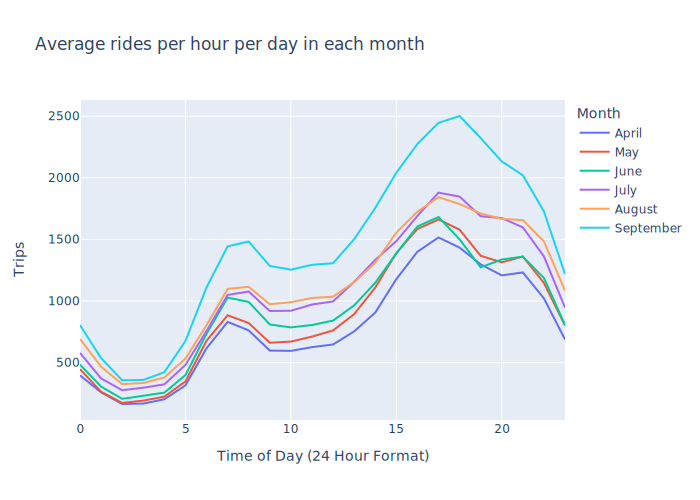

In [5]:
line_plot = px.line(y=[apr14_hours, may14_hours, jun14_hours, jul14_hours, aug14_hours, sep14_hours],
                    x=range(0, 24),title='Average rides per hour per day in each month')

newnames = {'wide_variable_0':'April', 'wide_variable_1': 'May','wide_variable_2': 'June',
            'wide_variable_3': 'July','wide_variable_4': 'August', 'wide_variable_5': 'September'}
line_plot.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))

line_plot.update_layout(legend_title="Month")

line_plot.update_xaxes(title = "Time of Day (24 Hour Format)")
line_plot.update_yaxes(title = "Trips")

line_plot.show()

We can see that we have a peak at around 8AM which can be explained by work related transit. Then, the amount of trips per hour stay high from around 4PM to 9PM. This is presumably because of work related transit as well as evening events. But this is a very shallow analysis. Let's dive deeper.

## For-Fun: Model average 

From the plot above we can see that the Trips per hour for one month can be modelled relatively accurately with a simple polynomial. I will choose a 7th degree polynomial. (This step is supposed to be a 'proof-of-concept' - less an actual analysis)


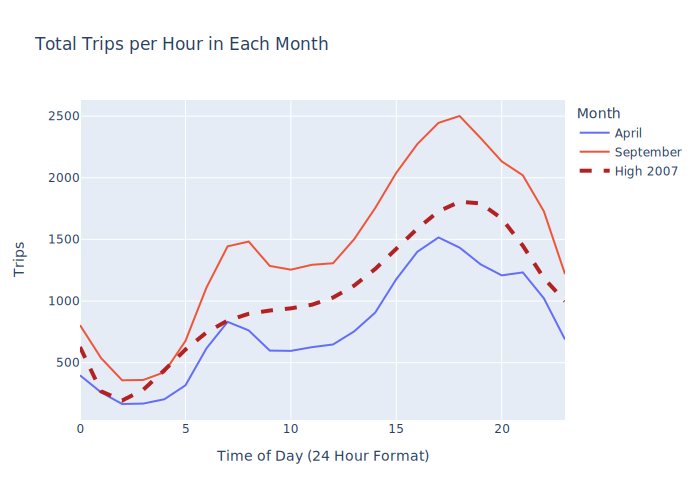

In [6]:
import plotly.graph_objects as go

avg_hours = (apr14_hours+may14_hours+jun14_hours+jul14_hours+aug14_hours+sep14_hours)/6
model = np.poly1d(np.polyfit(range(0,24), avg_hours, 7))

model_pred = model(range(0,24))

line_plot = px.line(y=[apr14_hours,sep14_hours],
                    x=np.array(range(0, 24)),title='Total Trips per Hour in Each Month')

newnames = {'wide_variable_0':'April', 'wide_variable_1': 'September'}
line_plot.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))

line_plot.add_trace(go.Scatter(x=np.array(range(0,24)), y=model_pred, name='High 2007',
                         line=dict(color='firebrick', width=4,
                              dash='dash')))

line_plot.update_layout(legend_title="Month")

line_plot.update_xaxes(title = "Time of Day (24 Hour Format)")
line_plot.update_yaxes(title = "Trips")
line_plot.show()

We can see that the model seems to accurately display the average. Cool that it works, but that's it. :) 

## Rides per Day and Month 📅



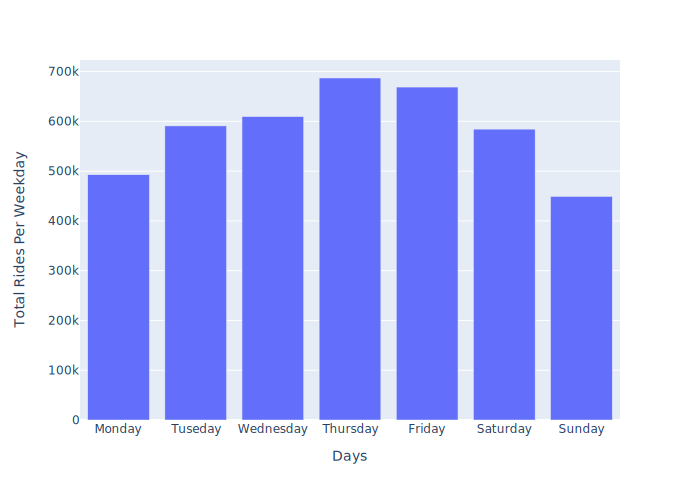

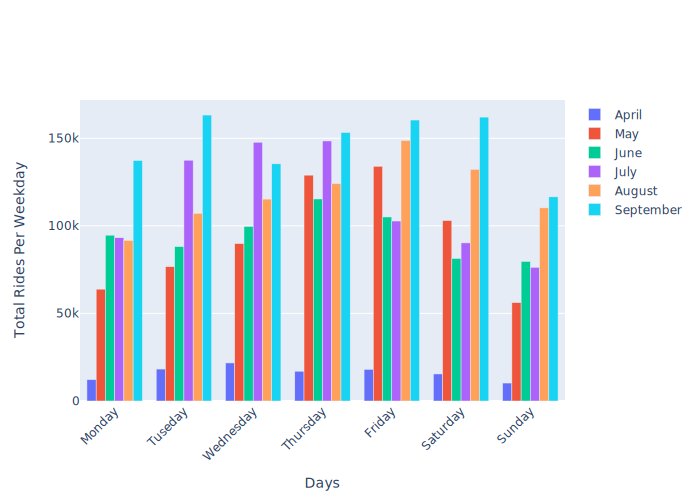

In [13]:
import plotly.graph_objects as go

apr14_day = apr14.groupby(apr14["Date/Time"].dt.weekday).size()
may14_day = may14.groupby(may14["Date/Time"].dt.weekday).size()
jun14_day = jun14.groupby(jun14["Date/Time"].dt.weekday).size()
jul14_day = jul14.groupby(jul14["Date/Time"].dt.weekday).size()
aug14_day = aug14.groupby(aug14["Date/Time"].dt.weekday).size()
sep14_day = sep14.groupby(sep14["Date/Time"].dt.weekday).size()


days = np.array(["Monday", "Tuseday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

bar_plot_total = px.bar(x=days, y =apr14_day+may14_day+jun14_day+jul14_day+aug14_day+sep14_day)
bar_plot_total.update_xaxes(title = "Days")
bar_plot_total.update_yaxes(title = "Total Rides Per Weekday")
bar_plot_total.show()

bar_plot = go.Figure(data=[
    go.Bar(name='April', x=days, y=apr14_day),
    go.Bar(name='May', x=days, y=may14_day),
    go.Bar(name='June', x=days, y=jun14_day),
    go.Bar(name='July', x=days, y=jul14_day),
    go.Bar(name='August', x=days, y=aug14_day),
    go.Bar(name='September', x=days, y=sep14_day)
])

bar_plot.update_xaxes(title = "Days")
bar_plot.update_yaxes(title = "Total Rides Per Weekday")

bar_plot.update_layout(barmode='group', xaxis_tickangle=-45)
bar_plot.show()




Here we can observer some interesting things. Firstly, Saturday and Sunday are not the busiest days. This means, most Uber pickups are likely to be work related. Sunday and Monday are by far the least busy. 

## What about Bases?

Bases describe which sub-contractor actually dispatched the uber. Let's just take a look at the absolute number of cars dispatched form each base in each month.

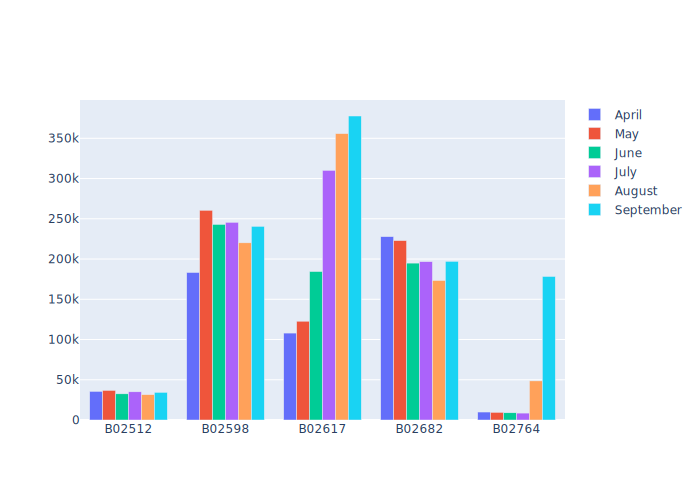

In [8]:
apr14_day = apr14.groupby(apr14["Base"]).size()
may14_day = may14.groupby(may14["Base"]).size()
jun14_day = jun14.groupby(jun14["Base"]).size()
jul14_day = jul14.groupby(jul14["Base"]).size()
aug14_day = aug14.groupby(aug14["Base"]).size()
sep14_day = sep14.groupby(sep14["Base"]).size()

bases = ['B02512','B02598','B02617','B02682','B02764']

bar_plot = go.Figure(data=[
    go.Bar(name='April', x=bases, y=apr14_day),
    go.Bar(name='May', x=bases, y=may14_day),
    go.Bar(name='June', x=bases, y=jun14_day),
    go.Bar(name='July', x=bases, y=jul14_day),
    go.Bar(name='August', x=bases, y=aug14_day),
    go.Bar(name='September', x=bases, y=sep14_day)
])

bar_plot.show()